In [21]:
from network import Net
from trainers import *
from utils import one_hot_monk
import numpy as np
import pandas as pd

(6, 124)
(17, 124)
Layer 1: Units = 4, Activation = relu
Layer 2: Units = 1, Activation = sigmoid
(4, 17)
(1, 4)
[array([[-0.68922455, -0.5722734 , -0.64877324,  0.13086425,  0.6123308 ,
        -0.26622521, -0.38264277,  0.05795224,  0.0464572 , -0.07223241,
         0.26579771, -0.52546484,  0.5523936 ,  0.4301761 , -0.44457768,
         0.55015394, -0.33643297],
       [-0.3366712 ,  0.525763  , -0.52859767,  0.19320075,  0.0106897 ,
         0.68188628, -0.49465038, -0.05882075, -0.48176506, -0.61590806,
         0.58595292, -0.5145833 ,  0.10283354,  0.44088962,  0.50976699,
        -0.14095007,  0.6870617 ],
       [-0.01589889, -0.57682051,  0.4058604 ,  0.58373791,  0.63744723,
        -0.19622158,  0.01961719, -0.32321727, -0.39982782, -0.40160555,
         0.5482905 ,  0.34866723,  0.33303676, -0.40168196, -0.44847908,
         0.49902789,  0.08462329],
       [ 0.44604656, -0.58410856, -0.19089522, -0.1417854 ,  0.5050213 ,
         0.18691891,  0.35392583, -0.52266717, -0.2

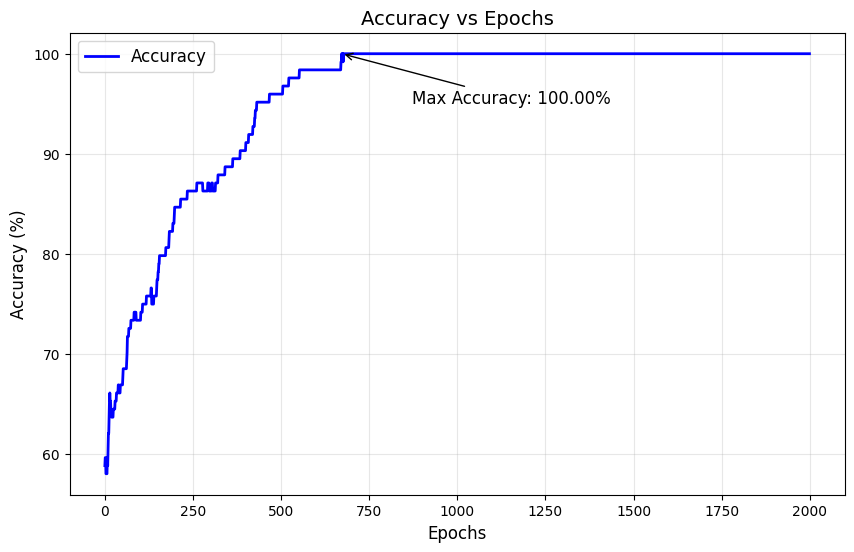

In [22]:
file_path = r'C:\Users\t-tan\OneDrive\Documenti\UNI\MAGISTRALE\ML\nn_from_scratch\datasets\monk_dataset\monks-1.train'
data = pd.read_csv(file_path, delimiter=' ', header=None, skipinitialspace=True)
data = np.array(data).T
n, m = data.shape # r, c
#np.random.shuffle(data)
# n,m == 8 124

Y_tr = data[0]

X_tr = data[1:n-1]
print(X_tr.shape)
X_tr = one_hot_monk(X_tr)
print(X_tr.shape)

network = Net()
network.add_layer(4, 'relu')
network.add_layer(1, 'sigmoid')
network.print_structure()

for i in range(len(network._W)):
    print(network._W[i].shape)

print(network._W)
for i in range(len(X_tr)):
    print(X_tr[i])

model = train('gd', X_tr, Y_tr, network.get_W(), network.get_b(), network.get_layers(),'bin_classification', 2000, 0.001, 'none' )

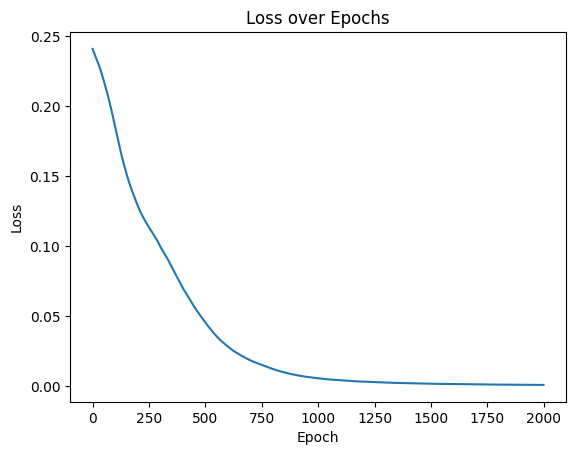

In [23]:
loss_df = pd.read_csv('loss_values.csv')

plt.plot(loss_df['epoch'], loss_df['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()